In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import url
import numpy as np

In [55]:
#connecting to database and reading in salaries, employees, and titles

engine = create_engine(url)
conn = engine.connect()


In [56]:
salaries = pd.read_sql("SELECT * FROM salaries", conn)
employees = pd.read_sql("SELECT * FROM employees", conn)
titles = pd.read_sql("SELECT * FROM titles", conn)

In [58]:
#set bins and plot histogram
salaries.min()

employee_number    100000
salary              40000
dtype: object

In [59]:
salaries.max()

employee_number     99999
salary             129492
dtype: object

In [60]:
salaries.median()

employee_number    249987.5
salary              48681.0
dtype: float64

In [61]:
bins = np.arange(40000,130001,5000)

In [62]:
bins

array([ 40000,  45000,  50000,  55000,  60000,  65000,  70000,  75000,
        80000,  85000,  90000,  95000, 100000, 105000, 110000, 115000,
       120000, 125000, 130000])

<function matplotlib.pyplot.show(close=None, block=None)>

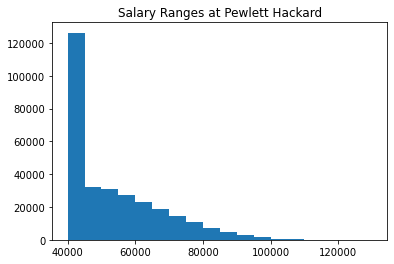

In [63]:
plt.hist(x=salaries["salary"], bins=bins)
plt.title("Salary Ranges at Pewlett Hackard")
plt.show

In [64]:
#find average salaries by title

In [65]:
salaries.columns

Index(['employee_number', 'salary'], dtype='object')

In [66]:
employees.columns

Index(['employee_number', 'title_id', 'dob', 'first_name', 'last_name', 'sex',
       'hire_date'],
      dtype='object')

In [67]:
titles.columns

Index(['title_id', 'title'], dtype='object')

In [68]:
emp_sal = employees.merge(salaries, how="inner", on='employee_number')

In [69]:
emp_sal_title = emp_sal.merge(titles, how="inner", on="title_id")

In [70]:
grouped_title = emp_sal_title.groupby("title")

In [71]:
avg_salaries = grouped_title["salary"].mean()

In [72]:
#plot bar graph
x = np.arange(len(avg_salaries))
labels = avg_salaries.index
width = .5

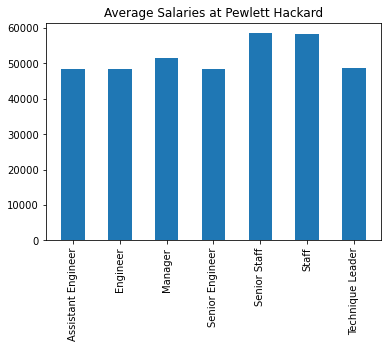

In [73]:
plt.title("Average Salaries at Pewlett Hackard")

plt.xticks(ticks = x, labels = labels, rotation=90)

plt.bar(x,avg_salaries, width)
plt.show()

In [74]:
#epilogue

employees.loc[employees['employee_number'] == "499942",:]

,employee_number,title_id,dob,first_name,last_name,sex,hire_date
168736,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
